# **Starbucks**


Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. Starbucks was founded in 1971 at Seattle's Pike Place Market.It is the world's largest coffeehouse chain.  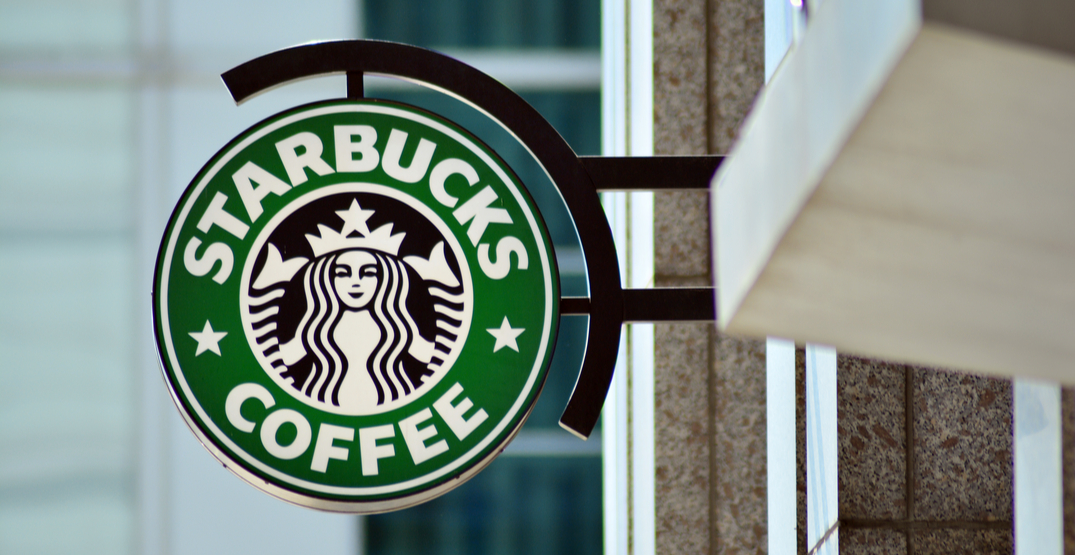

# Questions: 
1. local distribution of starbucks store around the world
2. Finding the correlation between different gradients in Drink menu
3. Fidning the drink with highest fat, carbohydrate, and Fiber
4. Finding the relative distrbution of vitamins in drink menu

In [225]:
import folium
import pandas as pd

In [226]:
cities = pd.read_csv('Starbucks/directory.csv')
cities.head()


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


# Distribution of starbucks around the world

world_all_cities = folium.Map(
    zoom_start=2,
    location=[51.00, 114.10]
)

cities = cities.dropna()

for _, city in cities.iterrows():
    folium.Marker(
        location=[city['Latitude'], city['Longitude']],
        popup=city['City'],
        tooltip=city['City'],
    ).add_to(world_all_cities)

world_all_cities

# US has the highest number of StarBucks stores

<AxesSubplot:>

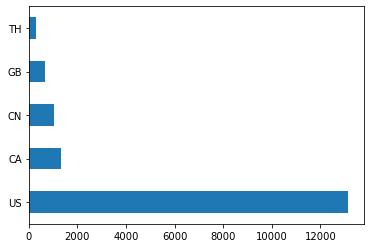

In [18]:
cities['Country'].value_counts()[:5].plot(kind='barh')


In [208]:

drinkMenu_expanded= pd.read_csv('Starbucks/starbucks_drinkMenu_expanded.csv')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
drinkMenu_expanded['Caffeine (mg)'] = drinkMenu_expanded['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
drinkMenu_expanded['Caffeine (mg)'] = drinkMenu_expanded['Caffeine (mg)'].astype('float')
drinkMenu_expanded['Caffeine (mg)'] = drinkMenu_expanded['Caffeine (mg)'].fillna(drinkMenu_expanded['Caffeine (mg)'].mean())
drinkMenu_expanded[' Total Fat (g)'] = drinkMenu_expanded[' Total Fat (g)'].replace('3 2', '3.2')

drinkMenu_expanded[ ' Calcium (% DV) '] = drinkMenu_expanded[ ' Calcium (% DV) ']. str. replace("%","")
drinkMenu_expanded[' Calcium (% DV) '] = drinkMenu_expanded[' Calcium (% DV) '].astype('float')
drinkMenu_expanded[ 'Vitamin A (% DV) '] = drinkMenu_expanded[ 'Vitamin A (% DV) ']. str. replace("%","")
drinkMenu_expanded['Vitamin A (% DV) '] = drinkMenu_expanded['Vitamin A (% DV) '].astype('float')
drinkMenu_expanded[ 'Vitamin C (% DV)'] = drinkMenu_expanded[ 'Vitamin C (% DV)']. str. replace("%","")
drinkMenu_expanded['Vitamin C (% DV)'] = drinkMenu_expanded['Vitamin C (% DV)'].astype('float')
drinkMenu_expanded[ 'Iron (% DV) '] = drinkMenu_expanded[ 'Iron (% DV) ']. str. replace("%","")
drinkMenu_expanded['Iron (% DV) '] = drinkMenu_expanded['Iron (% DV) '].astype('float')

## Correlation of graidents in all drinks 

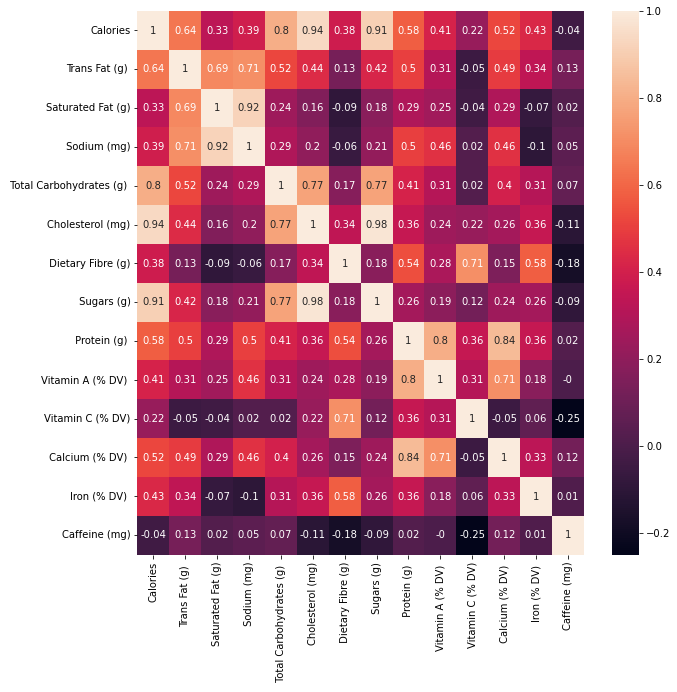

In [210]:
plt.figure(figsize=(10,10))
matrix = drinkMenu_expanded.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

## Correlation of Calroies, Cholesterol, and Sugar 

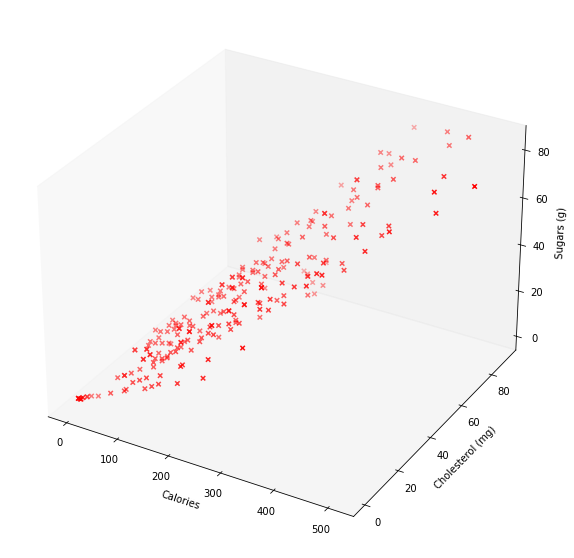

In [211]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(drinkMenu_expanded['Calories'],drinkMenu_expanded['Cholesterol (mg)'],drinkMenu_expanded[' Sugars (g)'], marker="x", c="red") # plot the point (2,3,4) on the figure
ax.set_xlabel('Calories')
ax.set_ylabel('Cholesterol (mg)')
ax.set_zlabel(' Sugars (g)')
ax.grid(False)
plt.show()

## Relative amount of Caffeine and Calories for all drinks in strbucks Menu

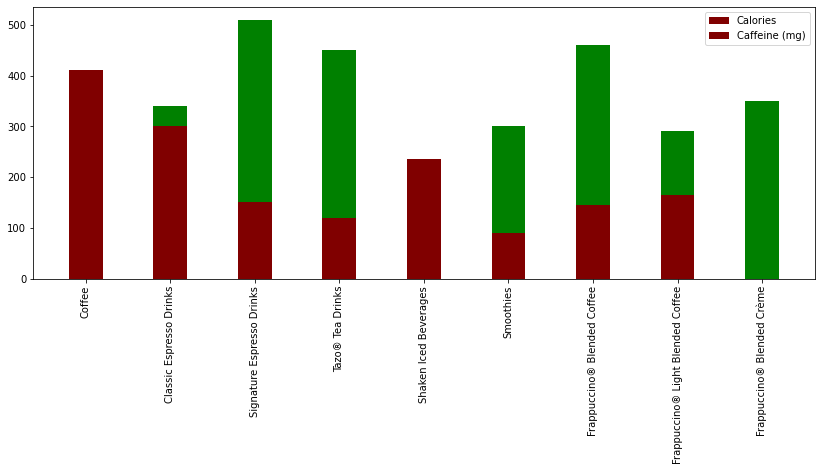

In [212]:
figure(num=None, figsize=(14, 5))

plt.bar(drinkMenu_expanded['Beverage_category'], drinkMenu_expanded['Calories'], color ='green',
        width = 0.4)


plt.xticks(rotation=90)


plt.bar(drinkMenu_expanded['Beverage_category'], drinkMenu_expanded['Caffeine (mg)'], color ='maroon',
        width = 0.4)
plt.legend([bp1, bp2], ['Calories','Caffeine (mg)'], loc='upper right')

## Distribution of prtein, carbohydrate, fiber and fat in drink menu

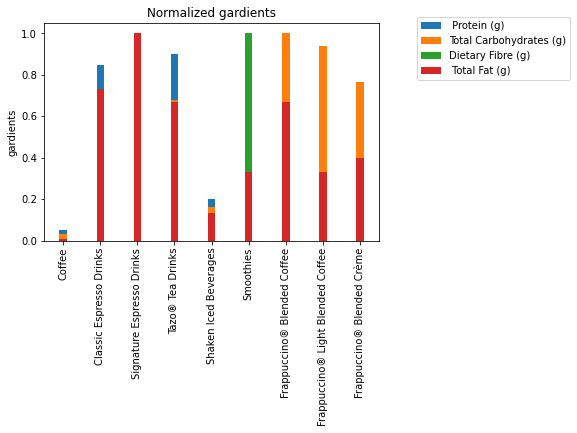

In [224]:
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt


column_names_to_normalize = [' Protein (g) ', ' Total Carbohydrates (g) ', ' Dietary Fibre (g)', ' Total Fat (g)']
x = drinkMenu_expanded[column_names_to_normalize].values
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = drinkMenu_expanded.index)
drinkMenu_expanded[column_names_to_normalize] = df_temp


x = np.arange(len(drinkMenu_expanded['Beverage_category'].unique())) 
labels = drinkMenu_expanded['Beverage_category'].unique()

fig, ax = plt.subplots()
rects1 = ax.bar(drinkMenu_expanded['Beverage_category'], drinkMenu_expanded[' Protein (g) '], width=0.2, label=' Protein (g) ')
rects2 = ax.bar(drinkMenu_expanded['Beverage_category'], drinkMenu_expanded[' Total Carbohydrates (g) '], width=0.2, label='Total Carbohydrates (g)')
rects3 = ax.bar(drinkMenu_expanded['Beverage_category'], drinkMenu_expanded[' Dietary Fibre (g)'], width=0.2, label='Dietary Fibre (g)')
rects4 = ax.bar(drinkMenu_expanded['Beverage_category'], drinkMenu_expanded[' Total Fat (g)'], width=0.2, label=' Total Fat (g)')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('gardients')
ax.set_title('Normalized gardients')

ax.legend()
ax.set_xticks(x,labels, rotation=90)
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()



## Correlation of Calories with sugar 

Text(0, 0.5, 'Sugars (g)')

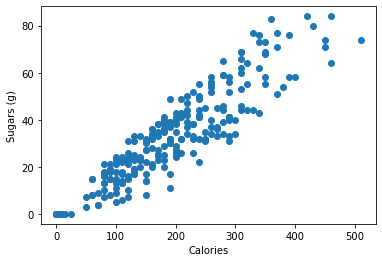

In [90]:
plt.scatter(drinkMenu_expanded['Calories'],drinkMenu_expanded[' Sugars (g)'])
plt.xlabel('Calories')
plt.ylabel('Sugars (g)')

##  Ratio of  trans-unsaturated fatty acids versus Saturated fat in drink menu

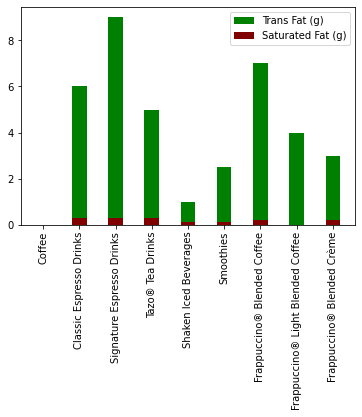

In [137]:
import matplotlib.pyplot as plt
labels = ['Trans Fat (g)','Saturated Fat (g)']
bp1 = plt.bar(drinkMenu_expanded['Beverage_category'], drinkMenu_expanded['Trans Fat (g) '], color ='green',
        width = 0.4)
plt.xticks(rotation=90)


bp2 = plt.bar(drinkMenu_expanded['Beverage_category'], drinkMenu_expanded['Saturated Fat (g)'], color ='maroon',
        width = 0.4)

plt.legend([bp1, bp2], ['Trans Fat (g)','Saturated Fat (g)'], loc='upper right')
plt.xticks(rotation=90)
plt.show()

## The relative ratio of vitamins in Starbucks drinks 

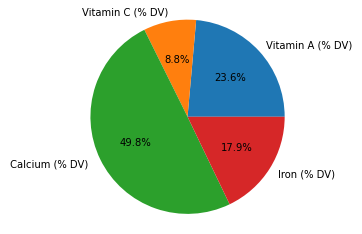

In [207]:
my_labels= ['Vitamin A (% DV) ', 'Vitamin C (% DV)',' Calcium (% DV) ','Iron (% DV) ']
data_fat= [drinkMenu_expanded['Vitamin A (% DV) '].mean(),drinkMenu_expanded['Vitamin C (% DV)'].mean(),drinkMenu_expanded[' Calcium (% DV) '].mean(),drinkMenu_expanded['Iron (% DV) '].mean()]

plt.pie(data_fat,labels=my_labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# Conclusion : 
- US has the highest number of StarBucks stores
- Most of the fat in drinks are trans-unsaturated fatty acids, not Saturated fat 
- Calcium has the highest amount in drink menu overal
- Drink with higher Calories also has higher sugar 
- Signature Espresso Drinks has the highest total fat(g), Smoothies has the highest amount of fibre, Frappuccino Light blended coffee has the highest carbohydrate, and tea has the highest protein
- Coffee has highest amount of Caffeine and it has same amoutn of Calories 




